## Реализация LU разложения без перестановок

In [1]:
import numpy as np

# LU-factorization without pivoting
n = 3
A = np.random.rand(n,n)
U = np.copy(A) 
L = np.eye(n)
for k in range(n-1):
    for j in range(k+1,n):
        L[j,k] =   U[j,k] / U[k,k]
        U[j,k:n] = U[j,k:n] - L[j,k] * U[k, k:n]

print('A = \n', A, '\n') 
print('L = \n', L, '\n')
print('U = \n', U, '\n')
print('A - L @ U = \n', A - L @ U, '\n')

A = 
 [[0.79850736 0.65244386 0.73488528]
 [0.09432387 0.76763496 0.40734354]
 [0.39161901 0.12110046 0.50744772]] 

L = 
 [[ 1.          0.          0.        ]
 [ 0.11812523  1.          0.        ]
 [ 0.49043882 -0.28800094  1.        ]] 

U = 
 [[0.79850736 0.65244386 0.73488528]
 [0.         0.69056488 0.32053504]
 [0.         0.         0.23934585]] 

A - L @ U = 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 



## LU разложение с перестановками с помощью готовой функции

In [5]:
# LU-factorization with pivoting
from scipy import linalg as scpla
n = 4
A = np.random.rand(n,n)
P, L, U = scpla.lu(A)
print('P = \n', P)
print('A - P @ L @ U = \n', A - P @ L @ U)

P = 
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
A - P @ L @ U = 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


## Решение задачи регрессии методом наименьших квадратов
Для решения переопределенной системы используется QR разложение

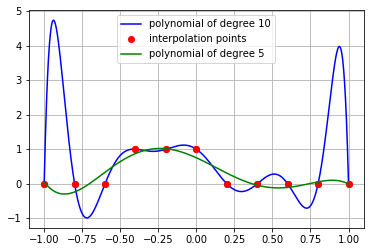

In [9]:
# Метод наименьших квадратов
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
m = 11
xx = np.linspace(-1, 1, m)
yy = np.array([0, 0, 0, 1., 1., 1, 0, 0, 0, 0, 0 ])
n = 11
# Создаем матрицу Вандермонда
A = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        A[i,j] = xx[i]**j
        
Q, R = np.linalg.qr(A)
v = Q.T @ yy
c = np.linalg.inv(R) @ v

plt.plot(xx, yy, 'ro')
x = np.linspace(-1,1, 1000)
plt.plot(x, np.polyval(c[::-1],x), 'b-', label  = 'polynomial of degree ' + str(n-1))

n = 6
# Создаем матрицу Вандермонда
A = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        A[i,j] = xx[i]**j
        
Q, R = np.linalg.qr(A)
v = Q.T @ yy
c = np.linalg.inv(R) @ v
plt.plot(xx, yy, 'ro', label = 'interpolation points')
x = np.linspace(-1,1, 1000)
plt.plot(x, np.polyval(c[::-1],x), 'g-', label  = 'polynomial of degree ' + str(n-1))
plt.legend()
plt.grid(True)